# Linear Algebra


<a id='index-0'></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d
from scipy.linalg import inv, solve, det, eig

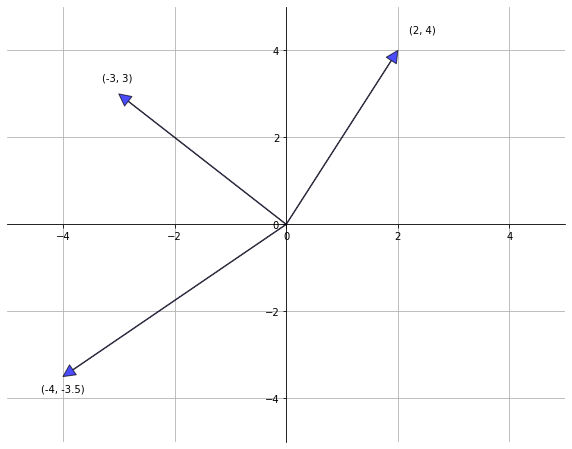

In [2]:
fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.grid()
vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.7,
                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))
plt.show()

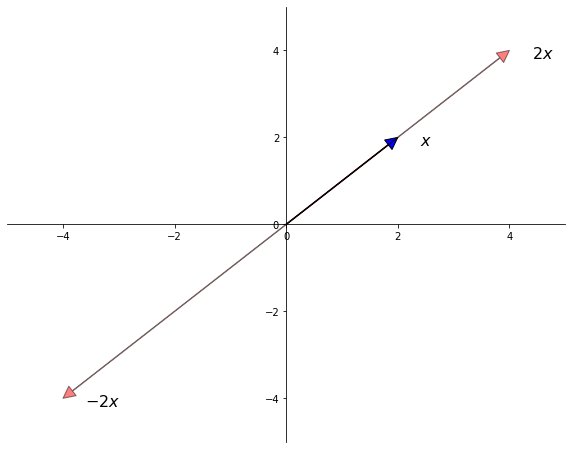

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
x = (2, 2)
ax.annotate('', xy=x, xytext=(0, 0),
            arrowprops=dict(facecolor='blue',
            shrink=0,
            alpha=1,
            width=0.5))
ax.text(x[0] + 0.4, x[1] - 0.2, '$x$', fontsize='16')


scalars = (-2, 2)
x = np.array(x)

for s in scalars:
    v = s * x
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.5,
                width=0.5))
    ax.text(v[0] + 0.4, v[1] - 0.2, f'${s} x$', fontsize='16')
plt.show()

In [4]:
x = np.ones(3)            # Vector of three ones
y = np.array((2, 4, 6))   # Converts tuple (2, 4, 6) into array
x + y

array([3., 5., 7.])

In [5]:
4 * x

array([4., 4., 4.])

In [6]:
np.sum(x * y)          # Inner product of x and y

12.0

In [7]:
np.sqrt(np.sum(x**2))  # Norm of x, take one

1.7320508075688772

In [8]:
np.linalg.norm(x)      # Norm of x, take two

1.7320508075688772

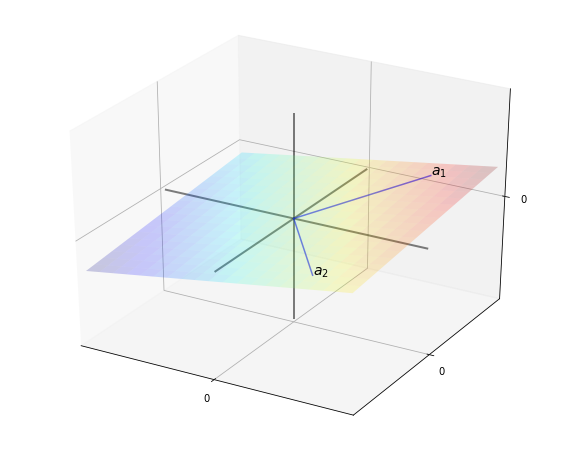

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

x_min, x_max = -5, 5
y_min, y_max = -5, 5

α, β = 0.2, 0.1

ax.set(xlim=(x_min, x_max), ylim=(x_min, x_max), zlim=(x_min, x_max),
       xticks=(0,), yticks=(0,), zticks=(0,))

gs = 3
z = np.linspace(x_min, x_max, gs)
x = np.zeros(gs)
y = np.zeros(gs)
ax.plot(x, y, z, 'k-', lw=2, alpha=0.5)
ax.plot(z, x, y, 'k-', lw=2, alpha=0.5)
ax.plot(y, z, x, 'k-', lw=2, alpha=0.5)


# Fixed linear function, to generate a plane
def f(x, y):
    return α * x + β * y

# Vector locations, by coordinate
x_coords = np.array((3, 3))
y_coords = np.array((4, -4))
z = f(x_coords, y_coords)
for i in (0, 1):
    ax.text(x_coords[i], y_coords[i], z[i], f'$a_{i+1}$', fontsize=14)

# Lines to vectors
for i in (0, 1):
    x = (0, x_coords[i])
    y = (0, y_coords[i])
    z = (0, f(x_coords[i], y_coords[i]))
    ax.plot(x, y, z, 'b-', lw=1.5, alpha=0.6)


# Draw the plane
grid_size = 20
xr2 = np.linspace(x_min, x_max, grid_size)
yr2 = np.linspace(y_min, y_max, grid_size)
x2, y2 = np.meshgrid(xr2, yr2)
z2 = f(x2, y2)
ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet,
                linewidth=0, antialiased=True, alpha=0.2)
plt.show()

In [10]:
A = ((1, 2),
     (3, 4))

type(A)

tuple

In [11]:
A = np.array(A)

type(A)

numpy.ndarray

In [12]:
A.shape

(2, 2)

In [13]:
A = np.identity(3)
B = np.ones((3, 3))
2 * A

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [14]:
A + B

array([[2., 1., 1.],
       [1., 2., 1.],
       [1., 1., 2.]])

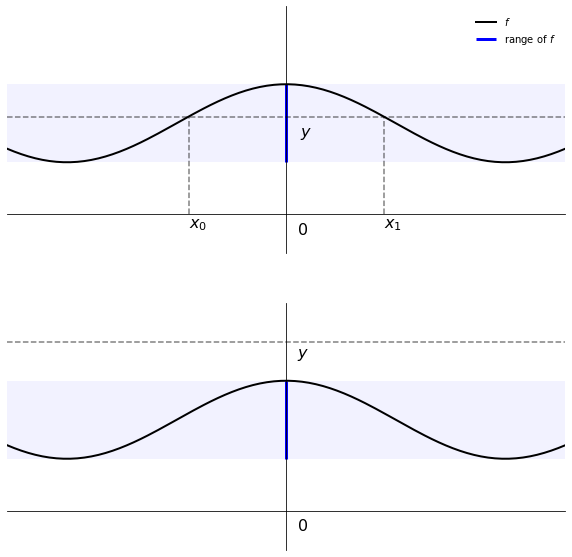

In [15]:
def f(x):
    return 0.6 * np.cos(4 * x) + 1.4


xmin, xmax = -1, 1
x = np.linspace(xmin, xmax, 160)
y = f(x)
ya, yb = np.min(y), np.max(y)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for ax in axes:
    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.set(ylim=(-0.6, 3.2), xlim=(xmin, xmax),
           yticks=(), xticks=())

    ax.plot(x, y, 'k-', lw=2, label='$f$')
    ax.fill_between(x, ya, yb, facecolor='blue', alpha=0.05)
    ax.vlines([0], ya, yb, lw=3, color='blue', label='range of $f$')
    ax.text(0.04, -0.3, '$0$', fontsize=16)

ax = axes[0]

ax.legend(loc='upper right', frameon=False)
ybar = 1.5
ax.plot(x, x * 0 + ybar, 'k--', alpha=0.5)
ax.text(0.05, 0.8 * ybar, '$y$', fontsize=16)
for i, z in enumerate((-0.35, 0.35)):
    ax.vlines(z, 0, f(z), linestyle='--', alpha=0.5)
    ax.text(z, -0.2, f'$x_{i}$', fontsize=16)

ax = axes[1]

ybar = 2.6
ax.plot(x, x * 0 + ybar, 'k--', alpha=0.5)
ax.text(0.04, 0.91 * ybar, '$y$', fontsize=16)

plt.show()

In [16]:
A = ((1, 2), (3, 4))
A = np.array(A)
y = np.ones((2, 1))  # Column vector
det(A)  # Check that A is nonsingular, and hence invertible

-2.0

In [17]:
A_inv = inv(A)  # Compute the inverse
A_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [18]:
x = A_inv @ y  # Solution
A @ x          # Should equal y

array([[1.],
       [1.]])

In [19]:
solve(A, y)  # Produces the same solution

array([[-1.],
       [ 1.]])

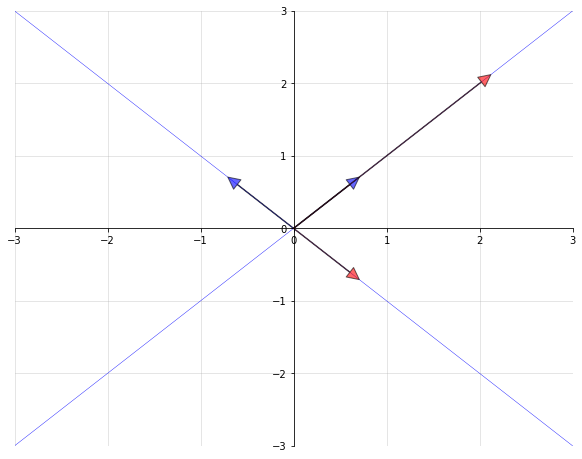

In [20]:
A = ((1, 2),
     (2, 1))
A = np.array(A)
evals, evecs = eig(A)
evecs = evecs[:, 0], evecs[:, 1]

fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
ax.grid(alpha=0.4)

xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# Plot each eigenvector
for v in evecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the image of each eigenvector
for v in evecs:
    v = A @ v
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the lines they run through
x = np.linspace(xmin, xmax, 3)
for v in evecs:
    a = v[1] / v[0]
    ax.plot(x, a * x, 'b-', lw=0.4)

plt.show()

In [21]:
A = ((1, 2),
     (2, 1))

A = np.array(A)
evals, evecs = eig(A)
evals

array([ 3.+0.j, -1.+0.j])

In [22]:
evecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])